# Crawl Korean fonts

한글 폰트를 대상으로 중간 실험을 하게 되었다. <br/>
네이버 한글날 손글씨 폰트를 수집하여 테스트해보자. <br/>


In [43]:
from time import sleep
from tqdm import tqdm

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [29]:
t = 0.5 # sleep time
url = 'https://clova.ai/handwriting/list.html'
download_link = 'https://ssl.pstatic.net/static/clova/service/clova_ai/event/handwriting/download/' # + 폰트명.ttf

In [45]:
def font_crawler_kor():
    options = webdriver.ChromeOptions()
    CHROME_DIR = '/Users/youngerous/young/bin/chromedriver'
    driver = webdriver.Chrome(CHROME_DIR, chrome_options=options)
    driver.set_window_size(1800,1800)
    driver.implicitly_wait(15)
    driver.get(url)
    sleep(t)
    
    body = driver.find_element_by_tag_name('body')
    
    # scroll down to the end
    for i in range(5):
        body.send_keys(Keys.CONTROL + Keys.END)
        sleep(t*5)
    
    # move to the top of the page
    body.send_keys(Keys.CONTROL + Keys.HOME)
    sleep(t)

    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; InteSl Mac O X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    response = requests.get(url, headers=headers)
    print('response code:', response.status_code)
    sleep(t)
    
    # collect all font names
    font_names = []
    font_items = driver.find_elements_by_class_name('font_item')
    for i in range(len(font_items)):
        sleep(t)
        font_names.append(font_items[i].text)
    print('fonts: ', len(font_names))
        
    # download fonts
    for i in tqdm(range(len(font_names))):
        driver.get(download_link + font_names[i] + '.ttf')
        sleep(t*2)
    
    sleep(5)
    driver.quit()

In [46]:
font_crawler_kor() # 저장된 109개의 폰트는 gitignore로 처리하였습니다.

response code: 200


  0%|          | 0/109 [00:00<?, ?it/s]

fonts:  109


100%|██████████| 109/109 [01:54<00:00,  1.05s/it]


---
# Make img
폰트 별로 구분하기 쉽도록 '닭'이라는 글자를 폰트별로 비교할 것이다.

In [48]:
import os
import shutil

from PIL import Image,ImageDraw,ImageFont

In [56]:
path = './collection/fonts_kor/'

In [53]:
fonts = [name for name in os.listdir(path) if name != '.DS_Store']

In [59]:
fonts # 총 폰트 (109개)

['나눔손글씨 성실체.ttf',
 '나눔손글씨 몽돌.ttf',
 '나눔손글씨 다시 시작해.ttf',
 '나눔손글씨 둥근인연.ttf',
 '나눔손글씨 혁이체.ttf',
 '나눔손글씨 행복한 도비.ttf',
 '나눔손글씨 바른히피.ttf',
 '나눔손글씨 손편지체.ttf',
 '나눔손글씨 희망누리.ttf',
 '나눔손글씨 백의의 천사.ttf',
 '나눔손글씨 달의궤도.ttf',
 '나눔손글씨 아줌마 자유.ttf',
 '나눔손글씨 세화체.ttf',
 '나눔손글씨 다채사랑.ttf',
 '나눔손글씨 하람체.ttf',
 '나눔손글씨 따악단단.ttf',
 '나눔손글씨 나의 아내 손글씨.ttf',
 '나눔손글씨 우리딸 손글씨.ttf',
 '나눔손글씨 사랑해 아들.ttf',
 '나눔손글씨 시우 귀여워.ttf',
 '나눔손글씨 고려글꼴.ttf',
 '나눔손글씨 갈맷글.ttf',
 '나눔손글씨 가람연꽃.ttf',
 '나눔손글씨 정은체.ttf',
 '나눔손글씨 무궁화.ttf',
 '나눔손글씨 힘내라는 말보단.ttf',
 '나눔손글씨 상해찬미체.ttf',
 '나눔손글씨 따뜻한 작별.ttf',
 '나눔손글씨 강인한 위로.ttf',
 '나눔손글씨 진주 박경아체.ttf',
 '나눔손글씨 엄마사랑.ttf',
 '나눔손글씨 세아체.ttf',
 '나눔손글씨 하나손글씨.ttf',
 '나눔손글씨 혜준체.ttf',
 '나눔손글씨 북극성.ttf',
 '나눔손글씨 유니 띵땅띵땅.ttf',
 '나눔손글씨 왼손잡이도 예뻐.ttf',
 '나눔손글씨 외할머니글씨.ttf',
 '나눔손글씨 자부심지우.ttf',
 '나눔손글씨 코코체.ttf',
 '나눔손글씨 효남 늘 화이팅.ttf',
 '나눔손글씨 칼국수.ttf',
 '나눔손글씨 미래나무.ttf',
 '나눔손글씨 강부장님체.ttf',
 '나눔손글씨 중학생.ttf',
 '나눔손글씨 나무정원.ttf',
 '나눔손글씨 무진장체.ttf',
 '나눔손글씨 점꼴체.ttf',
 '나눔손글씨 마고체.ttf',
 '나눔손글씨 대광유리.ttf',
 '나눔손글씨 배은혜체.ttf',


In [47]:
word = '닭'
canvas_size = 128

In [61]:
def save_font_word(word, canvas_size, font_style, file_name):
    canvas = Image.new('L', (canvas_size, canvas_size), color=255)
    draw = ImageDraw.Draw(canvas)
    
    font_style = './collection/fonts_kor/' + font_style
    try:
        font = ImageFont.truetype(font_style, size=80) # 150
        w, h = draw.textsize(word, font=font)    
        draw.text(((canvas_size-w)/2,(canvas_size-h)/5), word, fill=(0), font=font)

        canvas.save(file_name, "PNG")
    except Exception as e:
        print(font_style + '(' + word + ')' + ' : ' + str(e))

In [63]:
for (idx, style) in enumerate(fonts):
    filename = './collection/img_kor/'+style[:-4]+'.png'
    save_font_word(word, canvas_size, style, filename)

./collection/fonts_kor/나눔손글씨 하나손글씨.ttf(닭) : too many function definitions
./collection/fonts_kor/나눔손글씨 동화또박.ttf(닭) : too many function definitions


> 2개의 폰트를 제외한 총 107개의 폰트 이미지 생성 (gitignore 처리됨)


---
# 이미지를 obj 확장자로 변환

In [65]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from __future__ import absolute_import

import argparse
import glob
import os
import pickle as pickle
import random
import torch

def pickle_examples_kor(from_dir, train_path):
    """
    Compile a list of examples into pickled format, so during
    the training, all io will happen in memory
    """
    paths = glob.glob(os.path.join(from_dir, '*.png')) # 카테고리 폴더 내 모든 png 파일
    with open(train_path, 'wb') as ft:
        train_count = 0
        
        for p in paths:
            label = os.path.basename(p) # 파일 이름을 저장(한글 이름이 저장될 것))
            with open(p, 'rb') as f:
                img_bytes = f.read()
                r = random.random()
                example = (label, img_bytes)
                
                # pickle.dump(example, ft)
                torch.save(example, ft)
                train_count += 1
    print('{} imgs saved in train.obj, end'.format(train_count))
    return

In [67]:
from_dir = './collection/img_kor/'
save_dir_kor = './dataset/kor/train_kor.obj'

pickle_examples_kor(from_dir, save_dir_kor)

107 imgs saved in train.obj, end


---
# 샘플 출력

In [3]:
from common.dataset import PickledImageProvider
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sample = PickledImageProvider('./dataset/kor/train_kor.obj')

unpickled total 535 examples
saved total 107 examples only for byte


In [5]:
sample.examples[0] # (파일명, bytes)

('나눔손글씨 딸에게 엄마가.png',
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x80\x00\x00\x00\x80\x08\x00\x00\x00\x00\xe6U>\x17\x00\x00\x04fIDATx\x9c\xed\x99mL\x95e\x18\xc7\x7f\xe7$G\xdeI\x13\x0c\xed\r\xcc\xa5\x11i\nI\xa5en\x88\xc9\xdc\xc4^\xdcP\xdar\xcdb\xb5\\\xc3\xb19k\xa5&\xab\xb5Z.+\xac\xe1\\\xbe\xcf9>\x9c\x80\x1c\x83\xb5J\xfd\x90M\x8c\x99\xc6\xcbt+\x01Q\x18\x12\xf2\xce\xb9\xfap8\x87\x03\x9c\xe3\xb8oy\x0e\xcb\xdd\xd7\xa7\xfb\xbe\xfe\xcfs]\xbf\xe7z\xce\xb9\xdf\x1e\x9b0\xb1f\x9f\xe0\xfc\x06\xc0\x00\x18\x00\x03`\x00\x0c\x80\x010\x00\x06\xc0\x00\x18\x00\x03`\x00\x0c\xc0\x1d\x05\xf0\xdbY\x9d\xbbl\xe3v>\xd09\xed\xbe\x1a\x8d\xdb\xc6\xaf\x02\xe7\xbaj\xdb\'\x14\xa0\x1eZ\x82\x0c\xd0~<w~\xd8fO\xaf\t\xfa4\x82L\xd2\xcd\xde\xef\xdcW\xd6\xc7\xfd\xbb7x\x1c-z\xc14\x01\x9a\xf7\x146\xc0\xdc\xbc\x1c\x87\xd7u\x03\xc2tB\x89\x86\xd5\xbd\x19\n\xf6\x95?\xba|\x9d\xafB\x9b\xbbU\x9awf\xec\xb14\x00\xfe\xcc\xbe\x0b\xe2\xf2\xebG\xb8\xd7B\xb7\x88\xc8_\xcfA\x91\x85\x00\xe7\xd7\xda\xe1\x89\xfd=\xa3\x845\xd0\'"{\xc2\xe1\

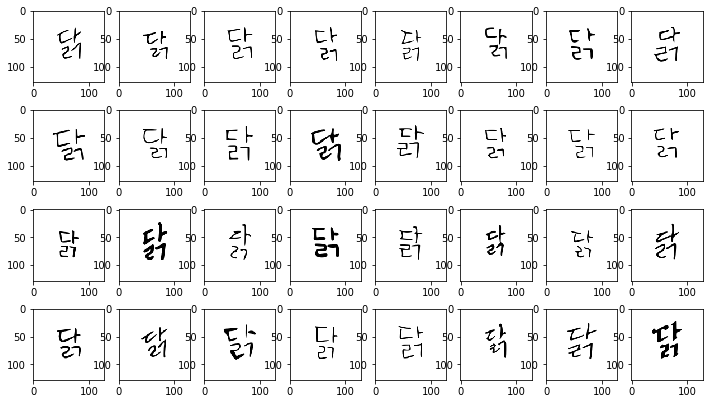

In [75]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(sample.examples[:32]):
    plt.subplot(4, 8, idx+1)
    plt.imshow(Image.open(io.BytesIO(sample.examples[idx][1])), cmap='gray')
plt.show()

---
# Resizing
아직 카테고리를 정하지 않은 상태이기 때문에 기존의 FontDataset을 사용할 순 없다. <br/>
살짝 변형한 KoreanFontDataset을 사용한다.

In [1]:
from common.dataset import KoreanFontDataset

In [6]:
dataset = KoreanFontDataset(sample)

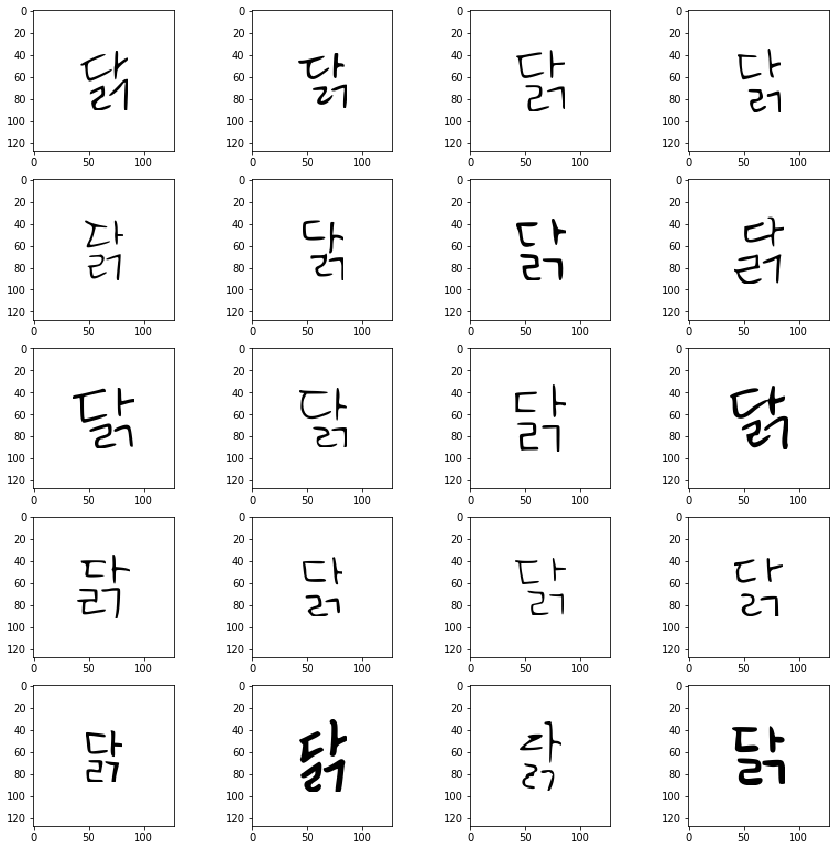

In [7]:
plt.figure(figsize=(15, 15))
for idx in range(20):
    plt.subplot(5, 4, idx+1)
    plt.imshow(dataset[idx][1], cmap='gray', label=idx)
plt.show()

---
# 정리
- 한글에도 적용해보기 위해 테스트 데이터를 만들었다.
- 네이버 손글씨 폰트를 모아서 각각 '닭'이라는 단어로 저장하였다.
- 기존의 FontDataset 대신 임시로 KoreanFontDataset을 사용하였다.